In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [3]:
df_train=pd.read_csv('../data/kaggle_house/train.csv',index_col=0)
test=pd.read_csv('../data/kaggle_house/test.csv',index_col=0)
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

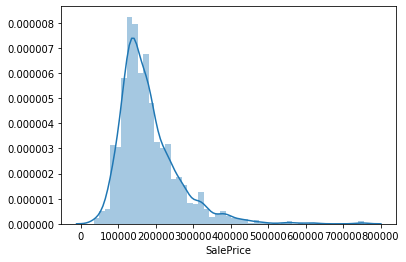

In [5]:
sns.distplot(df_train['SalePrice'])

In [6]:
print("skewness:%f" % df_train['SalePrice'].skew())
print("kurtosis:%f" % df_train['SalePrice'].kurt())

skewness:1.882876
kurtosis:6.536282


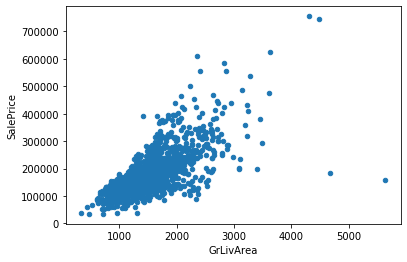

In [7]:
var='GrLivArea'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice')

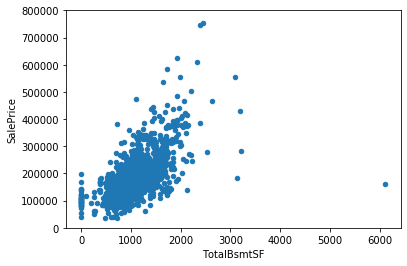

In [8]:
var='TotalBsmtSF'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

(-0.5, 9.5, 0, 800000)

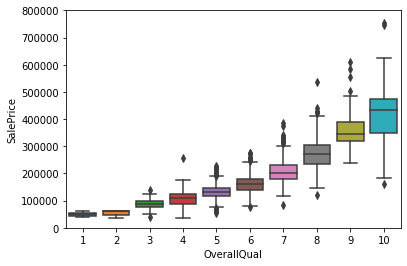

In [9]:
var='OverallQual'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)

(-0.5, 111.5, 0, 800000)

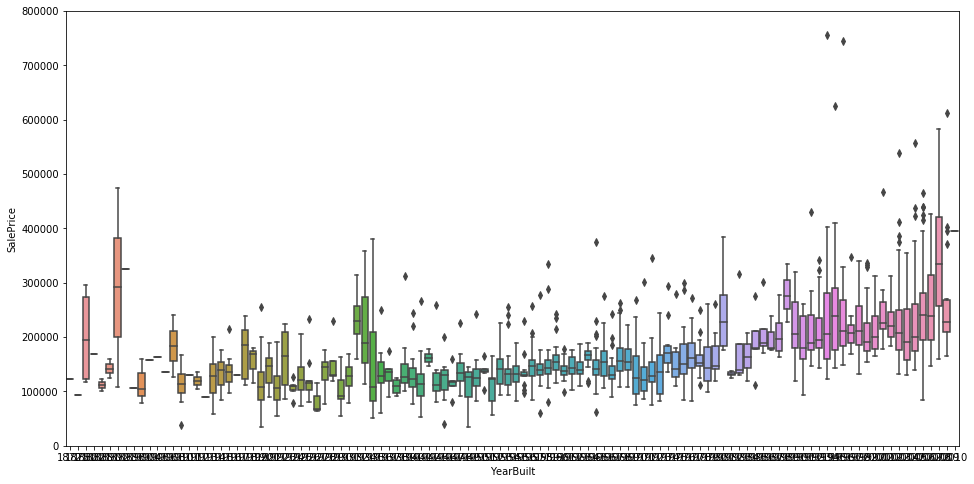

In [10]:
var='YearBuilt'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig=sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)

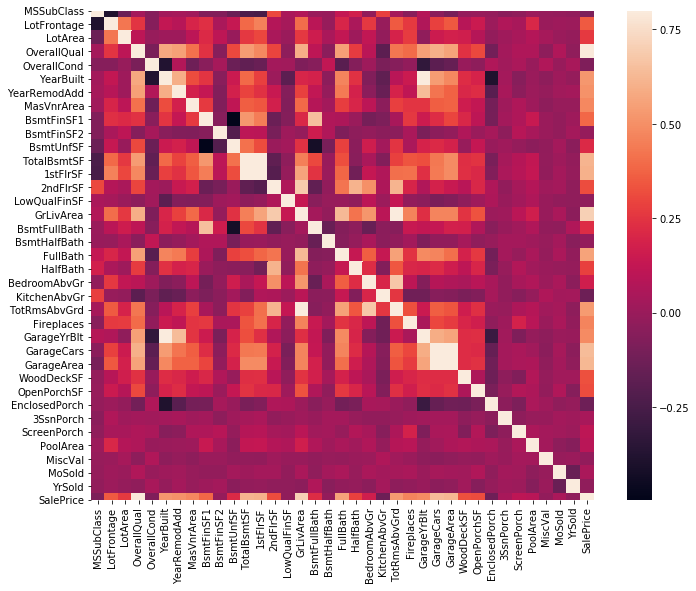

In [11]:
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

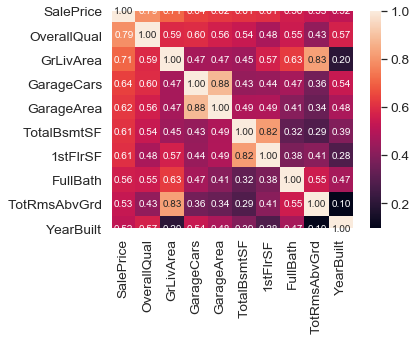

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

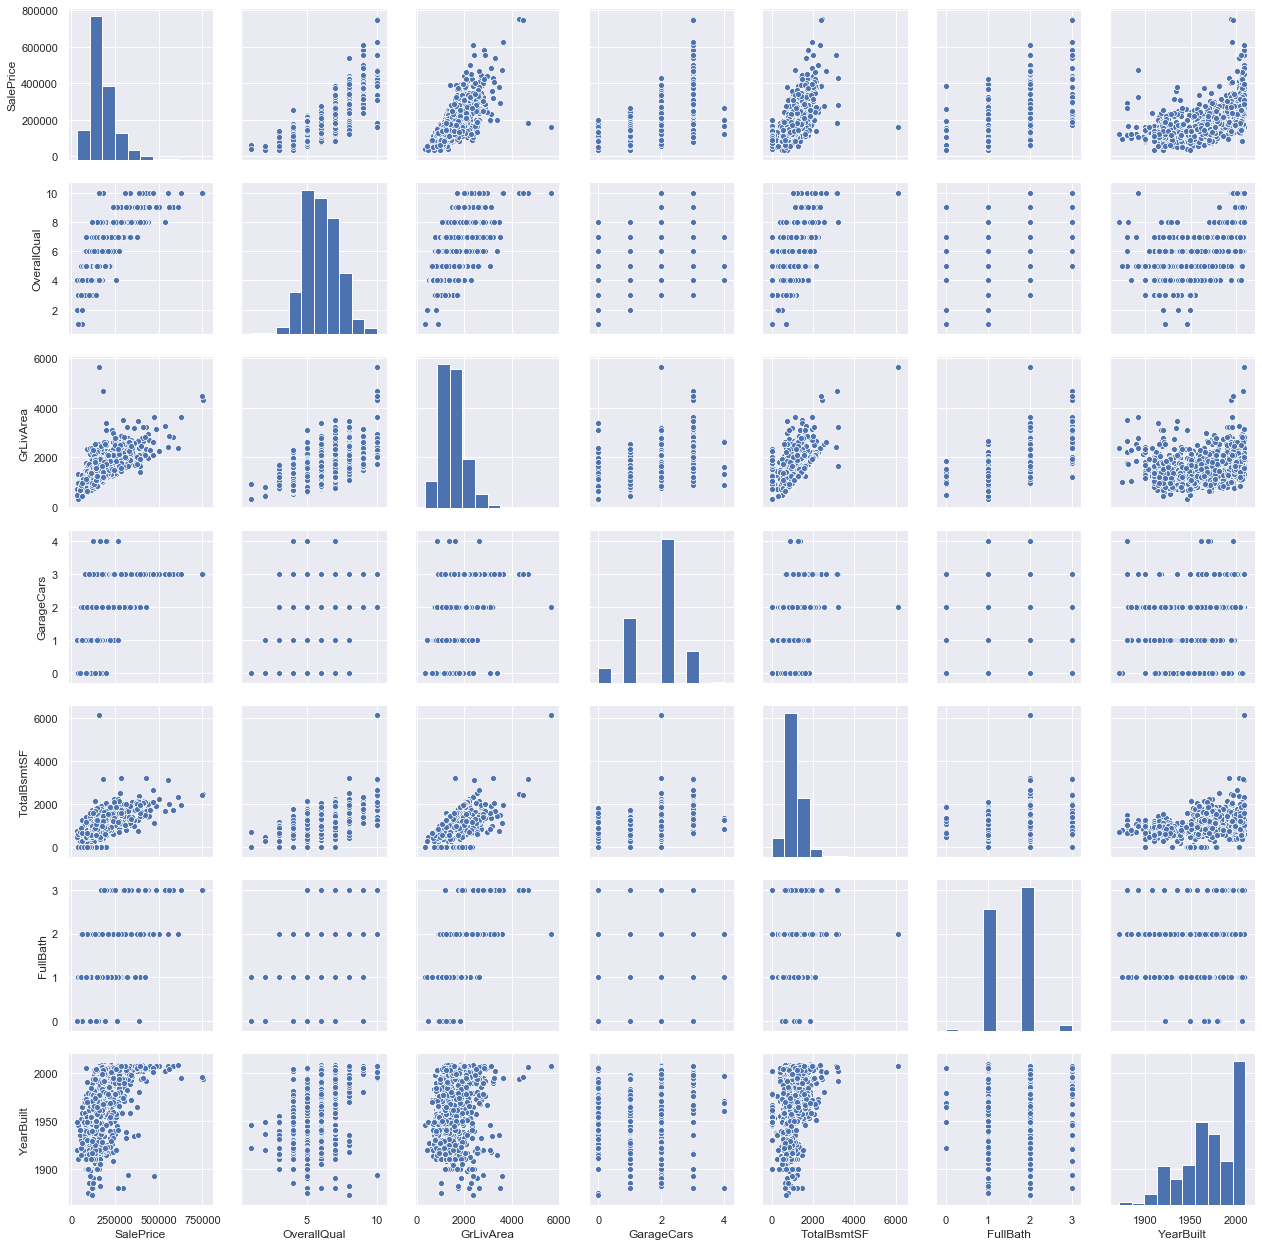

In [13]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols],size=2.5)
plt.show()

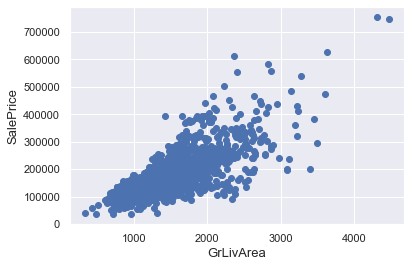

In [15]:
#Deleting outliers
train=pd.read_csv('../data/kaggle_house/train.csv',index_col=0)
test=pd.read_csv('../data/kaggle_house/test.csv',index_col=0)
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

MU =180932.92  and sigma =79467.79


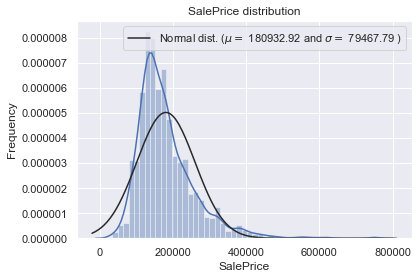

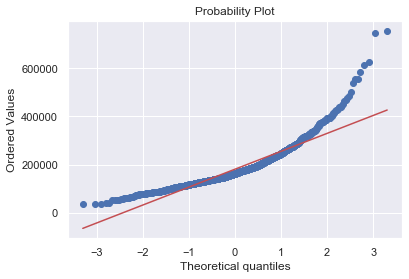

In [16]:
sns.distplot(train['SalePrice'],fit=norm)
(mu,sigma)=norm.fit(train['SalePrice'])
print('MU ={:.2f}  and sigma ={:.2f}'.format(mu,sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig=plt.figure()
res=stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [17]:
ntrain=train.shape[0]
ntest=test.shape[0]
y_train=train.SalePrice.values
all_data=pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print("all_data size is ：{} ".format(all_data.shape))

all_data size is ：(2917, 79) 


In [18]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
print(all_data_na)
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]
missing_data=pd.DataFrame({'missing ratio' :all_data_na})
missing_data.head(20)

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley           93.212204
BedroomAbvGr     0.000000
                  ...    
Utilities        0.068564
WoodDeckSF       0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
YrSold           0.000000
Length: 79, dtype: float64


,missing ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

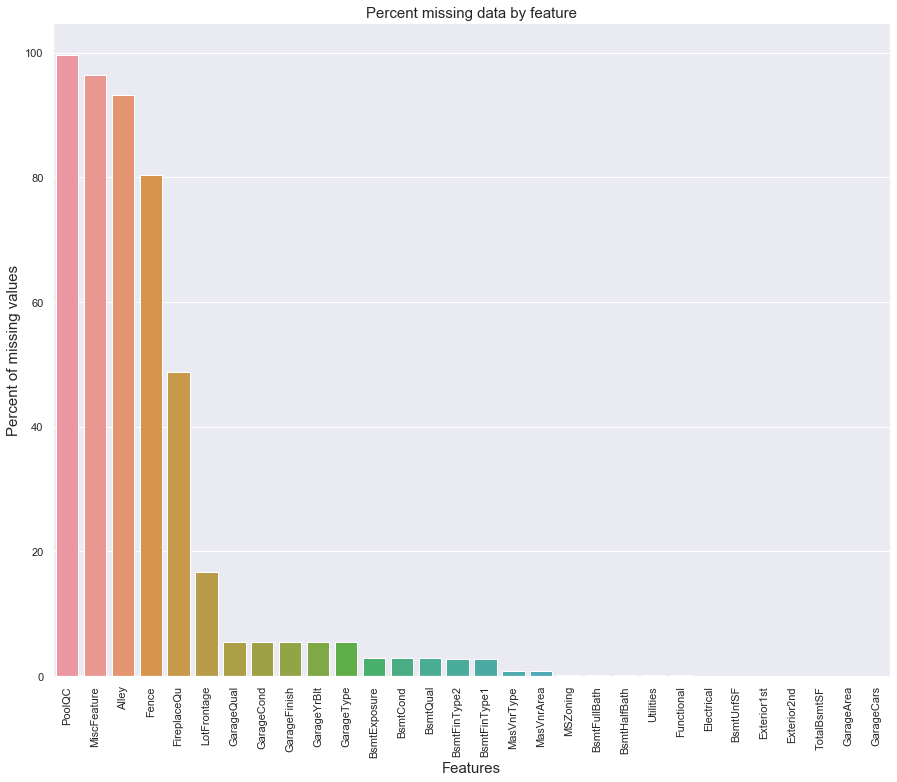

In [19]:
f,ax=plt.subplots(figsize=(15,12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index,y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


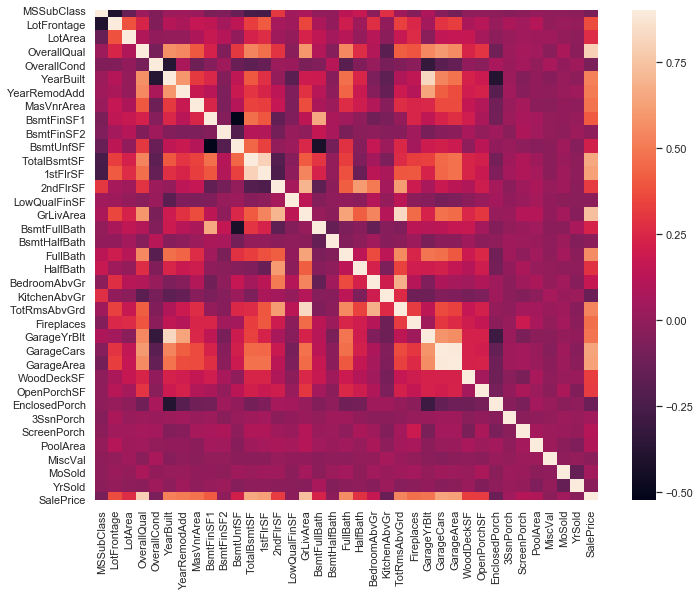

In [20]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [87]:

all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [88]:
all_data["LotFrontage"]=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

In [89]:
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    all_data[col]=all_data[col].fillna('None')

In [90]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    all_data[col]=all_data[col].fillna(0)

In [91]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [92]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")

In [93]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [94]:
all_data['Utilities']= all_data["Utilities"].fillna("None")

In [95]:
all_data['Functional']=all_data['Functional'].fillna('Typ')

In [96]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [97]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [98]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [99]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [100]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [36]:
#ordinalList = ['ExterQual', 'ExterCond', 'GarageQual', 'GarageCond','PoolQC',\
 #             'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtQual','BsmtCond']
#ordinalmap={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0}
#for c in ordinalList:
#    all_data[c]=all_data[c].map(ordinalmap)

In [37]:
#all_data['BsmtExposure']=all_data['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
#all_data['BstmFinType1']=all_data['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2,'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
#all_data['BsmtFinType2'] = all_data['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2,'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
#all_data['Functional'] = all_data['Functional'].map({'Maj2':1, 'Sev':2, 'Min2':3, 'Min1':4, 'Maj1':5, 'Mod':6, 'Typ':7})
#all_data['GarageFinish'] = all_data['GarageFinish'].map({'None':0, 'Unf':1, 'RFn':2, 'Fin':3})
#all_data['Fence'] = all_data['Fence'].map({'MnWw':0, 'GdWo':1, 'MnPrv':2, 'GdPrv':3, 'None':4})


In [38]:
#all_data.MasVnrType=all_data.MasVnrType.replace({'BrkCmn': 1,'BrkFace': 1,'CBlock': 1,'Stone': 1,'None': 0})

In [39]:
#all_data.SaleCondition= all_data.SaleCondition.replace({'Abnorml': 1,'Alloca': 1,'AdjLand': 1,'Family': 1,'Normal': 0,'Partial': 0})


In [40]:
#all_data = all_data.replace({'CentralAir': {'Y': 1,'N': 0}})
#all_data = all_data.replace({'PavedDrive': {'Y': 1,'P': 0,'N': 0}})
#all_data.MSSubClass= all_data['MSSubClass'].map({20: 1,30: 0,40: 0,45: 0,50: 0,60: 1,70: 0,75: 0,80: 0,85: 0,90: 0,120: 1,150: 0,160: 0,180: 0,190: 0})

#all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [101]:
all_data['MSSubClass']=all_data['MSSubClass'].astype(str)

In [102]:
all_data['MSSubClass'].value_counts()

20     1079
60      573
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [103]:
all_dummy=pd.get_dummies(all_data)
all_dummy.head()
all_data.shape
mean_cols = all_data.mean()
mean_cols.head(10)
all_dummy= all_dummy.fillna(mean_cols)

In [104]:
all_dummy.isnull().sum().sum()

#Check remaining missing values if any 


0

In [105]:
numeric_cols = all_data.columns[all_data.dtypes != 'object']
numeric_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [106]:
numeric_col_means=all_dummy.loc[:,numeric_cols].mean()
numeric_col_std=all_dummy.loc[:,numeric_cols].std()
all_dummy.loc[:,numeric_cols]=(all_dummy.loc[:,numeric_cols]-numeric_col_means)/numeric_col_std

In [107]:
all_dummy.shape

(2917, 317)